In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [10]:
with open('example_actual.json','r') as f:
    y=np.array(json.load(f))
with open('example_predicted.json','r') as f:
    yhat=np.array(json.load(f))

In [19]:
import sklearn.metrics as metrics

In [36]:
from pandas import DataFrame
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y, yhat)
confmat=metrics.confusion_matrix(y,yhat)
accuracy=np.diagonal(confmat/np.sum(confmat,axis=1))
class_labels = ['Blues','Classical','Country','Disco','HipHop','Jazz','Metal','Pop','Reggae','Rock']


In [34]:
metrics_df = DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': fscore,
    'Support': support
}, index=class_labels)
metrics_df.loc['Average'] = metrics_df.mean()
print(metrics_df)

           Accuracy  Precision    Recall  F1 Score  Support
Blues      0.145455   0.156863  0.145455  0.150943     55.0
Classical  0.133333   0.137931  0.133333  0.135593     60.0
Country    0.055556   0.088235  0.055556  0.068182     54.0
Disco      0.122449   0.113208  0.122449  0.117647     49.0
HipHop     0.127660   0.095238  0.127660  0.109091     47.0
Jazz       0.061224   0.060000  0.061224  0.060606     49.0
Metal      0.021739   0.017857  0.021739  0.019608     46.0
Pop        0.098039   0.106383  0.098039  0.102041     51.0
Reggae     0.117647   0.133333  0.117647  0.125000     51.0
Rock       0.078947   0.069767  0.078947  0.074074     38.0
Average    0.096205   0.097882  0.096205  0.096279     50.0


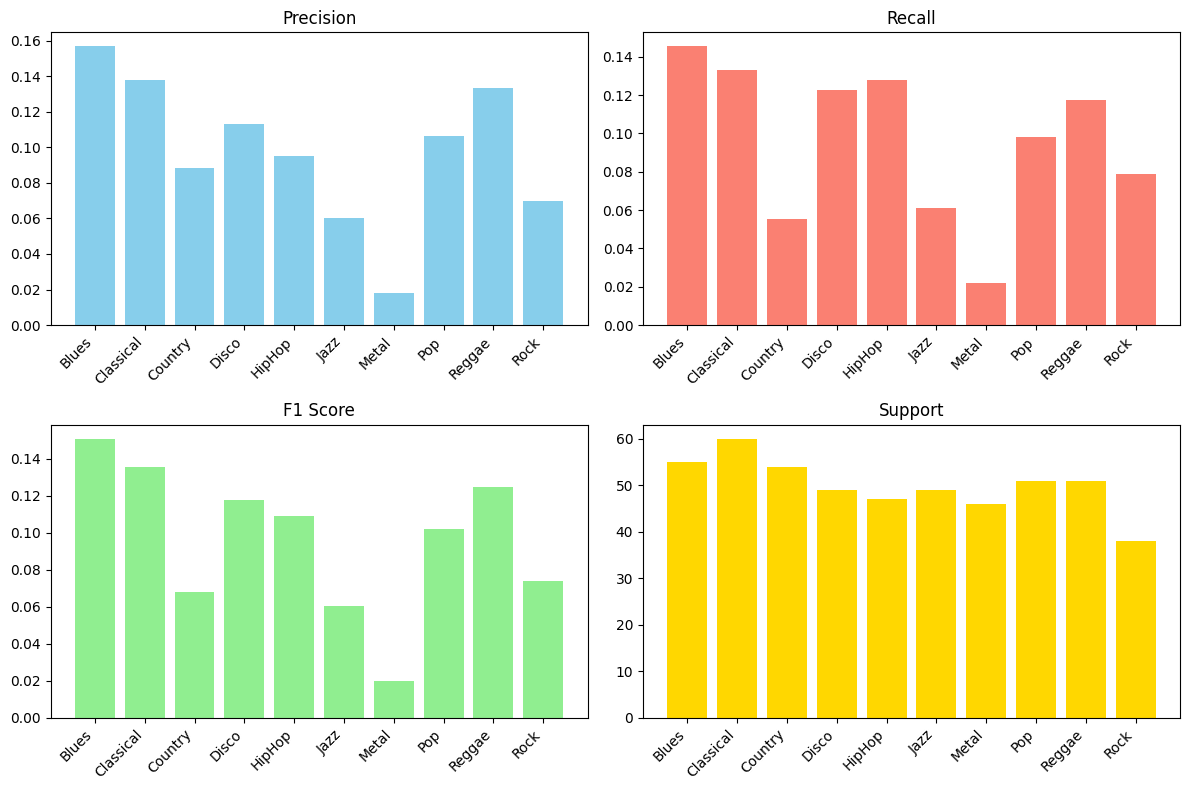

In [37]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Precision
ax[0, 0].bar(np.arange(len(class_labels)), precision, color='skyblue')
ax[0, 0].set_title('Precision')
ax[0, 0].set_xticks(np.arange(len(class_labels)))
ax[0, 0].set_xticklabels(class_labels, rotation=45, ha='right')

# Recall
ax[0, 1].bar(np.arange(len(class_labels)), recall, color='salmon')
ax[0, 1].set_title('Recall')
ax[0, 1].set_xticks(np.arange(len(class_labels)))
ax[0, 1].set_xticklabels(class_labels, rotation=45, ha='right')

# F1 Score
ax[1, 0].bar(np.arange(len(class_labels)), fscore, color='lightgreen')
ax[1, 0].set_title('F1 Score')
ax[1, 0].set_xticks(np.arange(len(class_labels)))
ax[1, 0].set_xticklabels(class_labels, rotation=45, ha='right')

# Support
ax[1, 1].bar(np.arange(len(class_labels)), support, color='gold')
ax[1, 1].set_title('Support')
ax[1, 1].set_xticks(np.arange(len(class_labels)))
ax[1, 1].set_xticklabels(class_labels, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

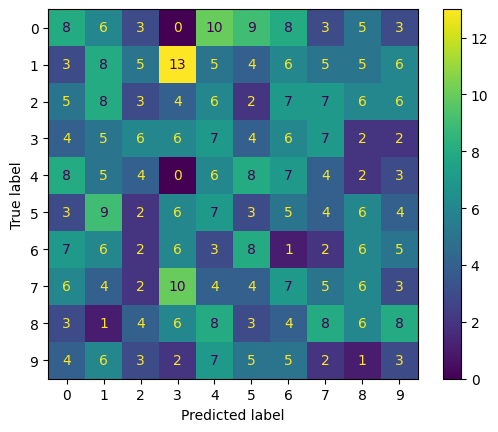

In [38]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confmat)
disp.plot()
plt.show()